## Expected Healing Time Analysis Using Markov Chain for Genital Herpes Lesion Stages

In [2]:
import numpy as np
import pandas as pd

# Step 1: Define the 7x7 transition matrix (P)
transition_matrix = np.array([
    [0.43, 0.23, 0.00, 0.00, 0.00, 0.13, 0.20],
    [0.27, 0.18, 0.07, 0.18, 0.14, 0.16, 0.00],
    [0.29, 0.10, 0.14, 0.45, 0.00, 0.02, 0.00],
    [0.00, 0.00, 0.35, 0.37, 0.24, 0.04, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.59, 0.26, 0.14],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.29],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00]
])

# Define labels for states
states = ['Macule (0)', 'Papule (1)', 'Vesicle (2)', 'Pustule (3)', 'Ulcer (4)', 'Crust (5)', 'Healed (6)']

# Create and display the transition matrix as a DataFrame
df_transition = pd.DataFrame(transition_matrix, index=states, columns=states)
print("Transition Matrix (P):")
print(df_transition)

# Step 2: Extract the transient submatrix Q (excluding the absorbing state 'Healed')
Q = transition_matrix[:6, :6]

# Step 3: Compute the fundamental matrix N = (I - Q)^(-1)
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)

# Create and display the fundamental matrix as a DataFrame
df_fundamental = pd.DataFrame(N, index=states[:-1], columns=states[:-1])
print("\nFundamental Matrix (N):")
print(df_fundamental)

# Step 4: Compute expected time to absorption (healing)
ones_vector = np.ones((Q.shape[0], 1))
expected_times = N @ ones_vector

# Step 5: Display expected healing times in a nice DataFrame
expected_time_df = pd.DataFrame(expected_times, index=states[:-1], columns=["Expected Healing Time (days)"])
print("\nExpected Healing Time (in days) from each lesion stage:")
print(expected_time_df)

Transition Matrix (P):
             Macule (0)  Papule (1)  Vesicle (2)  Pustule (3)  Ulcer (4)  \
Macule (0)         0.43        0.23         0.00         0.00       0.00   
Papule (1)         0.27        0.18         0.07         0.18       0.14   
Vesicle (2)        0.29        0.10         0.14         0.45       0.00   
Pustule (3)        0.00        0.00         0.35         0.37       0.24   
Ulcer (4)          0.00        0.00         0.00         0.00       0.59   
Crust (5)          0.00        0.00         0.00         0.00       0.00   
Healed (6)         0.00        0.00         0.00         0.00       0.00   

             Crust (5)  Healed (6)  
Macule (0)        0.13        0.20  
Papule (1)        0.16        0.00  
Vesicle (2)       0.02        0.00  
Pustule (3)       0.04        0.00  
Ulcer (4)         0.26        0.14  
Crust (5)         0.71        0.29  
Healed (6)        0.00        1.00  

Fundamental Matrix (N):
             Macule (0)  Papule (1)  Vesicle (2

## Graph Visualization

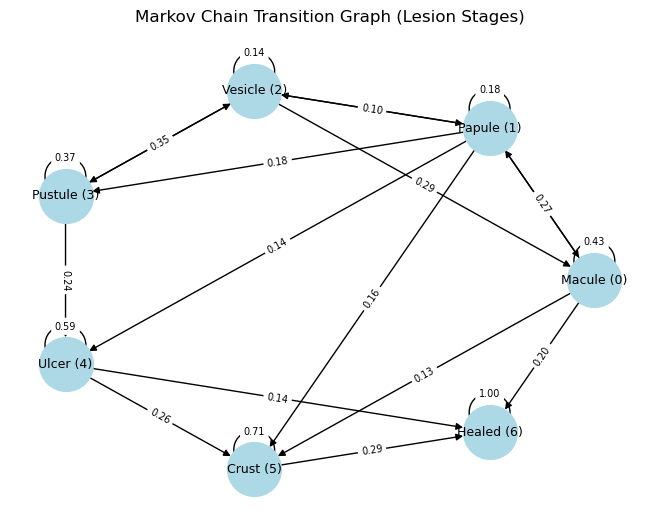

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (states)
for i, state in enumerate(states):
    G.add_node(i, label=state)

# Add edges with transition probabilities (only if > 0.05 for clarity)
for i in range(len(transition_matrix)):
    for j in range(len(transition_matrix[i])):
        prob = transition_matrix[i][j]
        if prob > 0.05:
            G.add_edge(i, j, weight=prob)

# Define positions for a circular layout
pos = nx.circular_layout(G)

# Draw nodes and edges
edge_labels = {(i, j): f"{d['weight']:.2f}" for i, j, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, labels={i: states[i] for i in G.nodes},
        node_size=1500, node_color='lightblue', font_size=9, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Markov Chain Transition Graph (Lesion Stages)")
plt.show()